# Data Processing

In [1]:
#Imported all default libaries required to successfully execute all blocks of codes.

import csv
import json
import random
import re
import sys
from datetime import datetime
from dateutil import relativedelta

## 1. Read in the provided ACW Data using the CSV library.

In [2]:
#Read in the csv file as dictionary.

with open("acw_user_data.csv") as csv_file:
    csv_reader = csv.DictReader( csv_file, delimiter=',' ) #finxter(2023), PythonforBeginners(2023) & datagy(2022)
    #Print each row of the csv file
    for row in csv_reader:
        print(row)

{'Address Street': '70 Lydia isle', 'Address City': 'Lake Conor', 'Address Postcode': 'S71 7XZ', 'Age (Years)': '89', 'Distance Commuted to Work (miles)': '0', 'Employer Company': 'N/A', 'Credit Card Start Date': '08/18', 'Credit Card Expiry Date': '11/27', 'Credit Card Number': '676373692463', 'Credit Card CVV': '875', 'Dependants': '3', 'First Name': 'Kieran', 'Bank IBAN': 'GB62PQKB71416034141571', 'Last Name': 'Wilson', 'Marital Status': 'married or civil partner', 'Yearly Pension (GBP)': '7257', 'Retired': 'True', 'Yearly Salary (GBP)': '72838', 'Sex': 'Male', 'Vehicle Make': 'Hyundai', 'Vehicle Model': 'Bonneville', 'Vehicle Year': '2009', 'Vehicle Type': 'Pickup'}
{'Address Street': '00 Wheeler wells', 'Address City': 'Chapmanton', 'Address Postcode': 'L2 7BT', 'Age (Years)': '46', 'Distance Commuted to Work (miles)': '13.72', 'Employer Company': 'Begum-Williams', 'Credit Card Start Date': '08/12', 'Credit Card Expiry Date': '11/26', 'Credit Card Number': '4529436854129855', 'Cre

## 2. As a CSV file is an entirely flat file structure, we need to convert our data back into its rich structure. Convert all flat structures into nested structures.

In [3]:
customer_list = [] #A list with dictionaries as it elements (each dictionary represent a customer each).

with open("acw_user_data.csv") as csv_file:
    csv_reader = csv.DictReader( csv_file, delimiter= "," )
    for row in csv_reader:
        #A structured dictionary for all customers.  
        customer_profile = {
            "first_name": row["First Name"],
            "second_name" : row["Last Name"],
            "age" : int(row["Age (Years)"]),
            "sex" : row["Sex"],
            "retired" : eval(row["Retired"]), #geeksforgeeks(2023)
            "marital_status" : row["Marital Status"],
            "dependants" : row["Dependants"],
            "salary" : float(row["Yearly Salary (GBP)"]),
            "pension" : float(row["Yearly Pension (GBP)"]),
            "company" : row["Employer Company"],
            "commute_distance" : float(row["Distance Commuted to Work (miles)"]),
            "vehicle" : {
                "make" : row["Vehicle Make"],
                "model" : row["Vehicle Model"],
                "year" : row["Vehicle Year"],
                "category" : row["Vehicle Type"],
            },
            "Credit Card": {
                "Start_date": row["Credit Card Start Date"],
                "end_date": row["Credit Card Expiry Date"],
                "number" : int(row["Credit Card Number"]),
                "ccv" : int(row["Credit Card CVV"]),
                "iban" : row["Bank IBAN"],
            },
            "Address": {
                "street" : row["Address Street"],
                "city" : row["Address City"],
                "postcode" : row["Address Postcode"]
            }
                   }
        
        customer_list.append(customer_profile)

In [4]:
customer_list #All customers.

[{'first_name': 'Kieran',
  'second_name': 'Wilson',
  'age': 89,
  'sex': 'Male',
  'retired': True,
  'marital_status': 'married or civil partner',
  'dependants': '3',
  'salary': 72838.0,
  'pension': 7257.0,
  'company': 'N/A',
  'commute_distance': 0.0,
  'vehicle': {'make': 'Hyundai',
   'model': 'Bonneville',
   'year': '2009',
   'category': 'Pickup'},
  'Credit Card': {'Start_date': '08/18',
   'end_date': '11/27',
   'number': 676373692463,
   'ccv': 875,
   'iban': 'GB62PQKB71416034141571'},
  'Address': {'street': '70 Lydia isle',
   'city': 'Lake Conor',
   'postcode': 'S71 7XZ'}},
 {'first_name': 'Jonathan',
  'second_name': 'Thomas',
  'age': 46,
  'sex': 'Male',
  'retired': False,
  'marital_status': 'married or civil partner',
  'dependants': '1',
  'salary': 54016.0,
  'pension': 0.0,
  'company': 'Begum-Williams',
  'commute_distance': 13.72,
  'vehicle': {'make': 'Nissan',
   'model': 'ATS',
   'year': '1996',
   'category': 'Coupe'},
  'Credit Card': {'Start_date

### 3. Print a list where all such error corrections take place.

In [5]:
problematic_rows = [] #A list that would contain the affected rows.


for customer_row, customer in enumerate(customer_list):
        # A condition to find where there is no value for dependants.
        if customer["dependants"] == "" or customer["dependants"] == " ":
            problematic_rows.append(customer_row + 2) # Appends the row number where dependants is empty to the problematic_row list.
            customer["dependants"] = random.randint(0,5) # Generates random numbers between 0 & 5 and replace with empty values.
        # All dependents are of data type String. 
        if type(customer["dependants"]) == str:
            customer["dependants"] = int(customer["dependants"]) # Converts dependents value to Integer.

print(f"Problematic rows for dependants: {problematic_rows}.")

Problematic rows for dependants: [23, 111, 181, 207, 272, 274, 276, 360, 462, 470, 581, 638, 681, 727, 824, 867, 919, 933, 985].


### 4. Write all records to a processed.json file in the JSON data format.

In [6]:
#This is a callable function used to write records into JSON data format.

def json_creator(json_file_name, json_file_content):
    with open(json_file_name, mode = "w") as json_file:
        json.dump(json_file_content,json_file)

In [7]:
json_creator("processed.json", customer_list) #Called the function json_creator to write all records to a json file.

### 5. Create two additional file outputs, retired.json and employed.json

In [8]:
retired_customers = [] #A list to store all retired customers.

#Loop through the list that contains all customers.
for ret_cus in customer_list:
    #Filtered retired customer by using a condition that checks if the value of the "retired" key for each customer (a dictionary) is True.
    if ret_cus["retired"] == True:
        retired_customers.append(ret_cus) #Append the customers (dictionaries) who satifies the condition to the retired_customer list.
        
json_creator("retired.json", retired_customers) #Called the function json_creator to write all retired customers' records to a json file.

In [9]:
retired_customers #All retired customers.

[{'first_name': 'Kieran',
  'second_name': 'Wilson',
  'age': 89,
  'sex': 'Male',
  'retired': True,
  'marital_status': 'married or civil partner',
  'dependants': 3,
  'salary': 72838.0,
  'pension': 7257.0,
  'company': 'N/A',
  'commute_distance': 0.0,
  'vehicle': {'make': 'Hyundai',
   'model': 'Bonneville',
   'year': '2009',
   'category': 'Pickup'},
  'Credit Card': {'Start_date': '08/18',
   'end_date': '11/27',
   'number': 676373692463,
   'ccv': 875,
   'iban': 'GB62PQKB71416034141571'},
  'Address': {'street': '70 Lydia isle',
   'city': 'Lake Conor',
   'postcode': 'S71 7XZ'}},
 {'first_name': 'Clive',
  'second_name': 'Evans',
  'age': 67,
  'sex': 'Male',
  'retired': True,
  'marital_status': 'single',
  'dependants': 1,
  'salary': 27964.0,
  'pension': 28075.0,
  'company': 'N/A',
  'commute_distance': 0.0,
  'vehicle': {'make': 'Volvo',
   'model': 'Express 3500 Passenger',
   'year': '2013',
   'category': 'SUV'},
  'Credit Card': {'Start_date': '07/15',
   'end_

In [10]:
employed_customers = [] #A list to store all employed customers.

#Loop through the list that contains all customers.
for emp_cus in customer_list:
    #Filtered employed customer by using a condition that checks if the value of the "retired" key for each customer (a dictionary) is False.
    if emp_cus["retired"] == False:
        employed_customers.append(emp_cus) #Append the customers (dictionaries) who satifies the condition to the employed_customer list.

json_creator("employed.json", employed_customers) #Called the function json_creator to write all employed customers' records to a json file.

In [11]:
employed_customers #All employed customers.

[{'first_name': 'Jonathan',
  'second_name': 'Thomas',
  'age': 46,
  'sex': 'Male',
  'retired': False,
  'marital_status': 'married or civil partner',
  'dependants': 1,
  'salary': 54016.0,
  'pension': 0.0,
  'company': 'Begum-Williams',
  'commute_distance': 13.72,
  'vehicle': {'make': 'Nissan',
   'model': 'ATS',
   'year': '1996',
   'category': 'Coupe'},
  'Credit Card': {'Start_date': '08/12',
   'end_date': '11/26',
   'number': 4529436854129855,
   'ccv': 583,
   'iban': 'GB37UMCO54540228728019'},
  'Address': {'street': '00 Wheeler wells',
   'city': 'Chapmanton',
   'postcode': 'L2 7BT'}},
 {'first_name': 'Antony',
  'second_name': 'Jones',
  'age': 22,
  'sex': 'Male',
  'retired': False,
  'marital_status': 'married or civil partner',
  'dependants': 1,
  'salary': 68049.0,
  'pension': 0.0,
  'company': 'Hill-Wright',
  'commute_distance': 16.02,
  'vehicle': {'make': 'GMC',
   'model': 'Achieva',
   'year': '2015',
   'category': 'Convertible, Coupe'},
  'Credit Card'

### 6.  For customers with more than ten years between their credit card start and end dates, write the records to a seperate file called remove_ccard.json 

In [12]:
#A callable function that converts dates inputted as String data type to date class object by taking the String value as an argument.
#Pynative Python Programming(2022), datagy(2021) & Tutorials Point(2022).

def convert_date(date_value):
    date_string = "".join(re.findall(r'\w+', date_value)) #Finds and removes any type of special character used to seperate the date values within the String.
    #Loops through the data format provided and checks if date value passed as an argument (now with any special character) matches any format indicated. 
    for date_format in ["%y%b","%b%y", "%m%y", "%y%m"]:
        try:
            return datetime.strptime(date_string, date_format).date()
            break
        except ValueError:
            pass

In [13]:
#A callable function that calculates the difference between a customer's credit card start date & end date and determine if the difference is more than 10 years old.

def ccard_checker(current_customer):
    
    start_date = convert_date(current_customer["Credit Card Start Date"]) #Converts a customer's credit card start date to a date object.
    end_date = convert_date(current_customer["Credit Card Expiry Date"]) #Converts a customer's credit card end date to a date object.
    date_diff = relativedelta.relativedelta(end_date,start_date) #Calculates the date difference using the relativedelta library from datetime package.
    #A condition that check if a customer's date difference is greater than 10 years old and flags it for removal.
    if (date_diff.years > 10) or (date_diff.months > 0  and date_diff.years == 10):
        flag_customer = True
        return flag_customer

In [14]:
removed_customers = [] #A list to store all customers whose credit card date difference is greater than 10 years old and flagged for removal.
with open("acw_user_data.csv", mode = "r") as customer_data_file:
    csv_data_reader = csv.DictReader(customer_data_file, delimiter = ",")
    for line_no, current_customer in enumerate(csv_data_reader):
        if ccard_checker(current_customer):
            removed_customers.append(customer_list[line_no])
json_creator("remove_ccard.json", removed_customers) #Called the function json_creator to write the records of all customers whose credit card date difference is more than 10 years old into a json file.

In [15]:
removed_customers

[{'first_name': 'Jonathan',
  'second_name': 'Thomas',
  'age': 46,
  'sex': 'Male',
  'retired': False,
  'marital_status': 'married or civil partner',
  'dependants': 1,
  'salary': 54016.0,
  'pension': 0.0,
  'company': 'Begum-Williams',
  'commute_distance': 13.72,
  'vehicle': {'make': 'Nissan',
   'model': 'ATS',
   'year': '1996',
   'category': 'Coupe'},
  'Credit Card': {'Start_date': '08/12',
   'end_date': '11/26',
   'number': 4529436854129855,
   'ccv': 583,
   'iban': 'GB37UMCO54540228728019'},
  'Address': {'street': '00 Wheeler wells',
   'city': 'Chapmanton',
   'postcode': 'L2 7BT'}},
 {'first_name': 'Julian',
  'second_name': 'Potter',
  'age': 43,
  'sex': 'Male',
  'retired': False,
  'marital_status': 'single',
  'dependants': 3,
  'salary': 96645.0,
  'pension': 0.0,
  'company': 'Clark Group',
  'commute_distance': 20.05,
  'vehicle': {'make': 'Lexus',
   'model': 'S-Series',
   'year': '1998',
   'category': 'Van/Minivan'},
  'Credit Card': {'Start_date': '07/

### 7a. Create a new data attribute for our customers called “Salary-Commute”. Reading in from processed.json: Add, and calculate appropriately, this new attribute. It should represent the Salary that a customer earns, per mile of their commute.

In [16]:
incentive_mile = 0.75 #This is the value added per mile travelled.

with open('processed.json', mode='r') as incentive_json:
    incentive_data = json.load(incentive_json)
    for row, customer_incentive in enumerate(incentive_data):
        #This calculates creates the new attribute and calculate the value if the condition is satisfied.
        if customer_incentive["commute_distance"] > 1.0:
            customer_incentive["Salary_Commute"] = float(customer_incentive["salary"] + (customer_incentive["commute_distance"] * incentive_mile))
        else:
            customer_incentive["Salary_Commute"] = customer_incentive["salary"]

### 7b. Sort the records by the new metric, in ascending order.

In [17]:
#Used Lambda function to sort the records by the Salary_Commute attribute in an ascending order.

incentive_data.sort(key=lambda customer_incentive: customer_incentive['Salary_Commute']) #Folkstalk(2022)

### 7c. Store the output file out as a JSON format, for a commute.json file.

In [18]:
json_creator("commute.json",incentive_data) #Called the function json_creator to write the sorted records to a json file.

# Data Visualisation

In [19]:
#Imported all libaries required to successfully execute all blocks of codes.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### With use of Pandas and Seaborn read in the original CSV file provided with the assignment.

In [20]:
dataframe = pd.read_csv("./acw_user_data.csv") #Used pandas to read the original CSV file.

In [21]:
dataframe_copy = dataframe.copy() #Created a copy our the original dataframe to avoid making changes directly to it.

In [22]:
dataframe_copy.head(10) #An overview of the first 10 records of the dataframe.

,Address Street,Address City,Address Postcode,Age (Years),Distance Commuted to Work (miles),Employer Company,Credit Card Start Date,Credit Card Expiry Date,Credit Card Number,Credit Card CVV,...,Last Name,Marital Status,Yearly Pension (GBP),Retired,Yearly Salary (GBP),Sex,Vehicle Make,Vehicle Model,Vehicle Year,Vehicle Type
0,70 Lydia isle,Lake Conor,S71 7XZ,89,0.00,NaN,08/18,11/27,676373692463,875,...,Wilson,married or civil partner,7257,True,72838,Male,Hyundai,Bonneville,2009,Pickup
1,00 Wheeler wells,Chapmanton,L2 7BT,46,13.72,Begum-Williams,08/12,11/26,4529436854129855,583,...,Thomas,married or civil partner,0,False,54016,Male,Nissan,ATS,1996,Coupe
2,Studio 33K Joel walk,Randallborough,ME3N 1GH,22,16.02,Hill-Wright,11/19,07/27,4091726363083888495,422,...,Jones,married or civil partner,0,False,68049,Male,GMC,Achieva,2015,"Convertible, Coupe"
3,Studio 46S Bethany lights,East Reece,E10 9RJ,56,19.35,Green LLC,10/17,04/18,4671332769487632633,669,...,Shaw,married or civil partner,0,False,91337,Male,Scion,F150 SuperCrew Cab,1994,Pickup
4,Flat 3 Christine views,Fletcherstad,WS2 9SN,57,5.94,"Hill, Evans and Harrison",04/19,11/27,2245094149128526,659,...,O'Brien,married or civil partner,0,False,18446,Female,Buick,Outback,2020,SUV
5,Studio 43M Emily rapid,West Derekborough,W1J 0DL,23,10.73,Gill and Sons,03/15,05/15,4485214746578045493,123,...,Clarke,married or civil partner,0,False,38100,Male,Lexus,Paceman,2004,Van/Minivan
6,24 Heather locks,New Mathew,WD10 1LX,43,20.05,Clark Group,07/12,03/29,36970652008212,622,...,Potter,single,0,False,96645,Male,Lexus,S-Series,1998,Van/Minivan
7,81 Goodwin dam,Griffinstad,G3 7ZX,67,0.00,NaN,07/15,04/27,213199489183130,389,...,Evans,single,28075,True,27964,Male,Volvo,Express 3500 Passenger,2013,SUV
8,798 Yates crescent,Port Lisa,LS0M 7UU,33,15.29,Richardson and Sons,05/13,08/20,30167634782545,849,...,Stanley,married or civil partner,0,False,63433,Female,Volkswagen,Town & Country,2010,"Sedan, Coupe, Hatchback"
9,Studio 77c Gail tunnel,Garyberg,S7W 4DW,87,0.00,NaN,10/13,10/13,213198388220332,766,...,Hamilton,single,29587,True,66157,Male,Dodge,Impreza,2015,Sedan


In [23]:
dataframe_copy.info() #An overview of the dataframe information.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Address Street                     1000 non-null   object 
 1   Address City                       1000 non-null   object 
 2   Address Postcode                   1000 non-null   object 
 3   Age (Years)                        1000 non-null   int64  
 4   Distance Commuted to Work (miles)  1000 non-null   float64
 5   Employer Company                   754 non-null    object 
 6   Credit Card Start Date             1000 non-null   object 
 7   Credit Card Expiry Date            1000 non-null   object 
 8   Credit Card Number                 1000 non-null   int64  
 9   Credit Card CVV                    1000 non-null   int64  
 10  Dependants                         981 non-null    float64
 11  First Name                         1000 non-null   object

## 1. Obtain the Data Series for Salary, and Age, and calculate the following: Mean Salary and Median Age

In [24]:
age_series = dataframe_copy["Age (Years)"]
salary_series = dataframe_copy["Yearly Salary (GBP)"]

print(f" The Mean Salary is {salary_series.mean()}.")
print(f" The Median Age is {age_series.median()}")

 The Mean Salary is 57814.078.
 The Median Age is 54.0


## 2a. Perform univariate plots of Age, calculating how many bins would be required for a bin_width of 5.

In [25]:
age_max = age_series.max()
age_min = age_series.min()
age_diff = age_max - age_min
bin_width = 5
num_bins = round(age_diff /bin_width) #Programiz(2022)
num_bins

15

Text(0.5, 1.0, 'Age Distribution of Customers.')

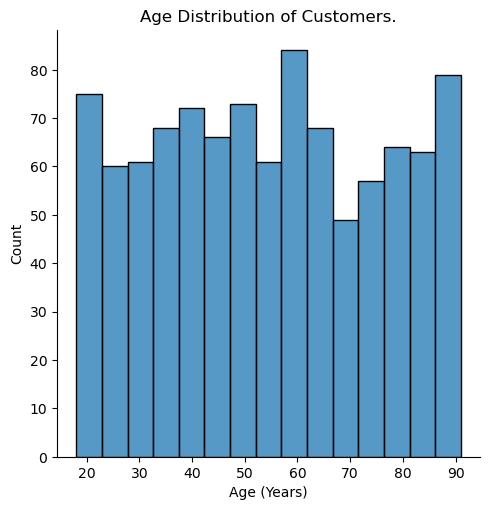

In [26]:
age_plot = sns.displot(dataframe_copy, x = "Age (Years)", bins = num_bins)
plt.title("Age Distribution of Customers.")

## 2b. Perform univariate plots of Dependents, fixing data errors with seaborn itself.

Text(0.5, 1.0, "A Plot Showing Customers' Dependents.")

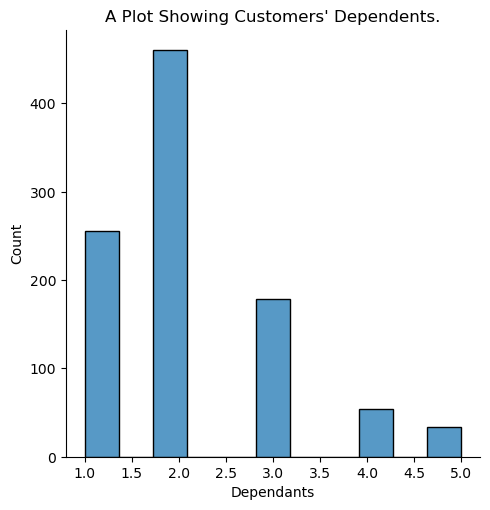

In [27]:
dependants_plot = sns.displot(dataframe_copy["Dependants"].dropna()) #Removed 19 records with empty dependant values with the dropna() method.
plt.title("A Plot Showing Customers' Dependents.")

## 2c. Perform univariate plots of Age (of default bins), conditioned on Marital Status.

Text(0.5, 1.0, 'A Plot Showing Age Distribution, Conditioned On Marital Status.')

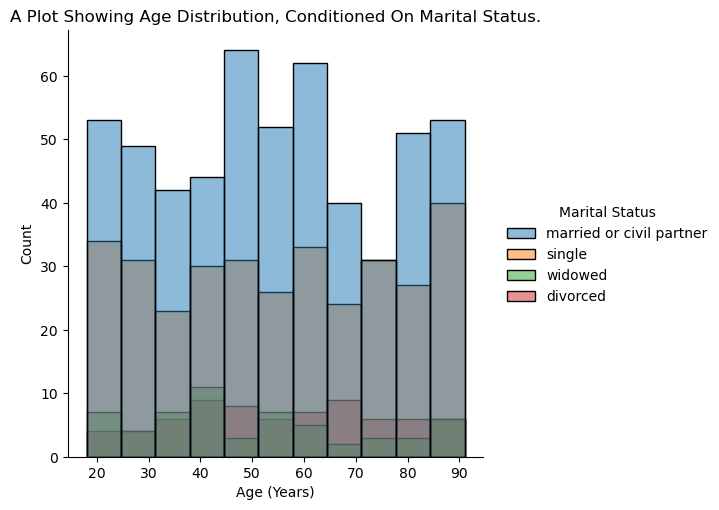

In [28]:
age_marital_plot = sns.displot(dataframe_copy, x = "Age (Years)", hue = "Marital Status")
plt.title("A Plot Showing Age Distribution, Conditioned On Marital Status.")

## 3a. Perform multivariate plots with Commuted distance against salary.

Text(0.5, 1.0, 'Commuted Distance Against Salary.')

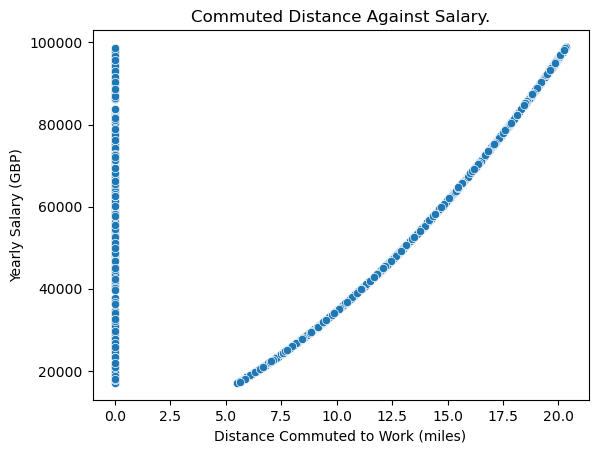

In [29]:
commuted_salary_plot = sns.scatterplot(data = dataframe_copy, x = "Distance Commuted to Work (miles)", y = "Yearly Salary (GBP)")
plt.title("Commuted Distance Against Salary.")

## 3b. Perform multivariate plots with Age against Salary.

Text(0.5, 1.0, 'Age Against Salary.')

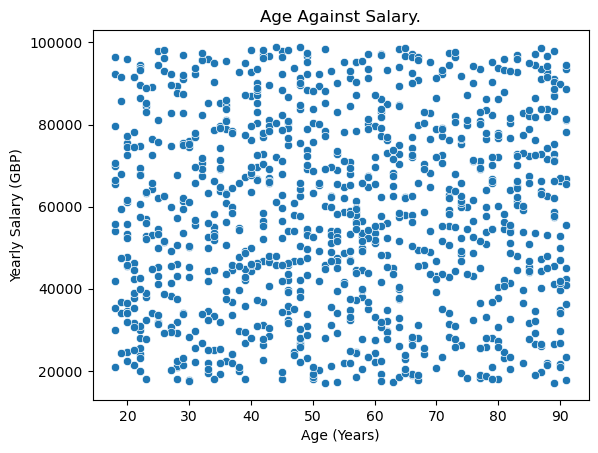

In [30]:
age_salary_plot = sns.scatterplot(data = dataframe_copy, x = "Age (Years)", y = "Yearly Salary (GBP)")
plt.title("Age Against Salary.")

## 3c. Perform multivariate plots with Age against Salary conditioned by Dependants.

Text(0.5, 1.0, 'Age Against Salary Conditioned By Dependants.')

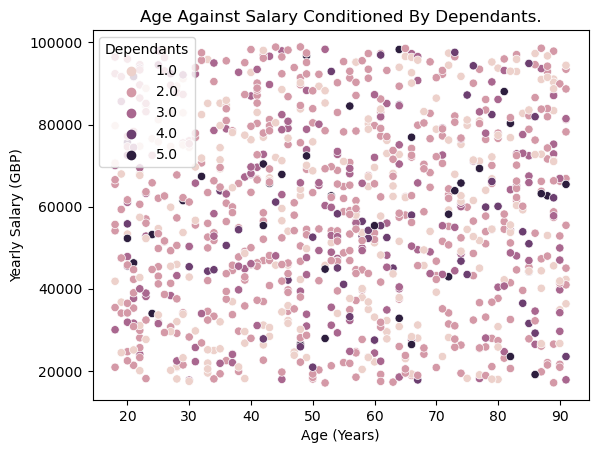

In [31]:
cleaned_dep_series = dataframe_copy[dataframe_copy["Dependants"].notna()] #Used Pandas to remove all rows with no dependent value and created a new dataseries. Hackers and Slackers(2022).
age_salary_dep_plot = sns.scatterplot(data = cleaned_dep_series, x = "Age (Years)", y = "Yearly Salary (GBP)", hue = "Dependants")
plt.title("Age Against Salary Conditioned By Dependants.")

## 4. Save all plots.

In [32]:
plots_to_save = {}
plots_to_save["./age.png"] = age_plot
plots_to_save["./dependents.png"] = dependants_plot
plots_to_save["./age_marital.png"] = age_marital_plot
plots_to_save["./commute_salary.png"] = commuted_salary_plot
plots_to_save["./age_salary.png"] = age_salary_plot
plots_to_save["./age_salary_dep.png"] = age_salary_dep_plot

for plt_key, plt_value in plots_to_save.items():
    plt_value.figure.savefig(plt_key) #The figure() method was used in order to retrieve and save plots created using the AxeSubPlot objects. You(2022).

# References

- #### fixnter(2023). Convert CSV to Dictionary in Python (https://blog.finxter.com/convert-csv-to-dictionary-in-python/).
- #### PythonforBeginners(2022). Read CSV Into List of Dictionaries in Python (https://www.pythonforbeginners.com/basics/read-csv-into-list-of-dictionaries-in-python).
- #### datagy(2022). How to Read CSV Files in Python (to list, dict) (https://datagy.io/python-read-csv/).
- #### geeksforgeeks(2023). Python – Convert String Truth values to Boolean (https://www.geeksforgeeks.org/python-convert-string-truth-values-to-boolean/).
- #### Pynative Python Programming(2022). Python Difference Between Two Dates in Months and Years (https://pynative.com/python-difference-between-two-dates-in-months/).
- #### datagy(2021). Convert Python String to Date: Python’s strptime Function (https://datagy.io/python-string-to-date/).
- #### Tutorials Point(2022). How to extract date from text using Python regular expression? (https://www.tutorialspoint.com/How-to-extract-date-from-text-using-Python-regular-expression).
- #### Folkstalk(2022). Python List Sort Key Lambda On Equal Other Function With Code Examples (https://www.folkstalk.com/tech/python-list-sort-key-lambda-on-equal-other-function-with-code-examples/).
- #### Programiz(2022). Python round() (https://www.programiz.com/python-programming/methods/built-in/round).
- #### Hackers and Slackers(2022). Dropping Rows of Data Using Pandas (https://hackersandslackers.com/pandas-dataframe-drop/#:~:text=If%20you're%20looking%20to,method%20is%20specifically%20for%20this.&text=Technically%20you%20could%20run%20df,rows%20where%20are%20completely%20empty.).
- #### You(2022) (https://you.com/search?q=%27axessubplot%27+object+has+no+attribute+%27savefig%27&tbm=youchat&cfr=chatb&cid=c2_08af70fa-4908-496b-89be-20d48585d234).